In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.spatial.distance import squareform, pdist
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
import gudhi

        a   b
Points       
P1      1   1
P2      7   0
P3      4   6
P4      9   6
P5      0  14
P6      2  19
P7      9  17


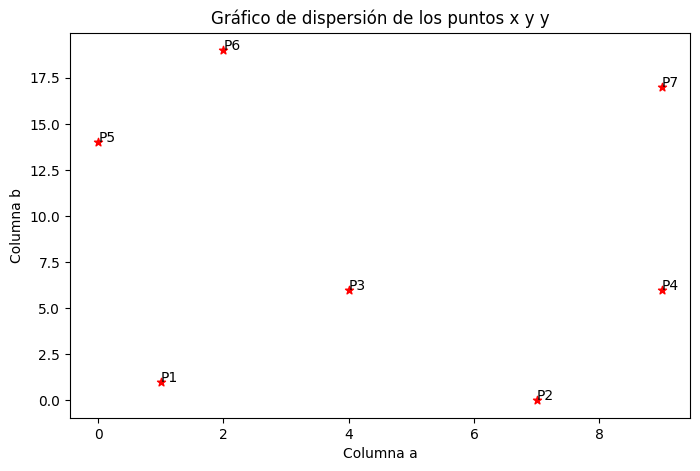

In [2]:
a=[1,7,4,9,0,2,9]
b=[1,0,6,6,14,19,17]

points = ["P1", "P2", "P3", "P4", "P5", "P6", "P7"]
data = pd.DataFrame({"Points": points, "a": np.round(a, 2), "b": np.round(b, 2)})
data = data.set_index("Points")
print(data)
# Grafiquemos los puntos
plt.figure(figsize=(8, 5))
plt.scatter(data["a"], data["b"], c='r', marker='*')
plt.xlabel("Columna a")
plt.ylabel("Columna b")
plt.title("Gráfico de dispersión de los puntos x y y")
for j in data.itertuples():
    plt.text(j.a, j.b, j.Index)

In [3]:
dist = pd.DataFrame(squareform(pdist(data[["a","b"]]), 'euclidean'), columns=data.index.values, index=data.index.values)
dist

,P1,P2,P3,P4,P5,P6,P7
P1,0.000000,6.082763,5.830952,9.433981,13.038405,18.027756,17.888544
P2,6.082763,0.000000,6.708204,6.324555,15.652476,19.646883,17.117243
P3,5.830952,6.708204,0.000000,5.000000,8.944272,13.152946,12.083046
P4,9.433981,6.324555,5.000000,0.000000,12.041595,14.764823,11.000000
P5,13.038405,15.652476,8.944272,12.041595,0.000000,5.385165,9.486833
P6,18.027756,19.646883,13.152946,14.764823,5.385165,0.000000,7.280110
P7,17.888544,17.117243,12.083046,11.000000,9.486833,7.280110,0.000000


In [4]:
rips_complex = gudhi.RipsComplex(points=data.values, max_edge_length=20)

In [5]:
# Generamos el arbol de complejos simpliciales e imprimimos la información
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
result_str = 'Rips complex is of dimension ' + repr(simplex_tree.dimension()) + ' - ' + \
    repr(simplex_tree.num_simplices()) + ' simplices - ' + \
    repr(simplex_tree.num_vertices()) + ' vertices.'
print(result_str) # Imprimimos la información del complejo simplicial
fmt = '%s -> %.2f'
for filtered_value in simplex_tree.get_filtration():
    print(fmt % tuple(filtered_value))

Rips complex is of dimension 2 - 63 simplices - 7 vertices.
[0] -> 0.00
[1] -> 0.00
[2] -> 0.00
[3] -> 0.00
[4] -> 0.00
[5] -> 0.00
[6] -> 0.00
[2, 3] -> 5.00
[4, 5] -> 5.39
[0, 2] -> 5.83
[0, 1] -> 6.08
[1, 3] -> 6.32
[1, 2] -> 6.71
[0, 1, 2] -> 6.71
[1, 2, 3] -> 6.71
[5, 6] -> 7.28
[2, 4] -> 8.94
[0, 3] -> 9.43
[0, 1, 3] -> 9.43
[0, 2, 3] -> 9.43
[4, 6] -> 9.49
[4, 5, 6] -> 9.49
[3, 6] -> 11.00
[3, 4] -> 12.04
[2, 3, 4] -> 12.04
[3, 4, 6] -> 12.04
[2, 6] -> 12.08
[2, 3, 6] -> 12.08
[2, 4, 6] -> 12.08
[0, 4] -> 13.04
[0, 2, 4] -> 13.04
[0, 3, 4] -> 13.04
[2, 5] -> 13.15
[2, 4, 5] -> 13.15
[2, 5, 6] -> 13.15
[3, 5] -> 14.76
[2, 3, 5] -> 14.76
[3, 4, 5] -> 14.76
[3, 5, 6] -> 14.76
[1, 4] -> 15.65
[0, 1, 4] -> 15.65
[1, 2, 4] -> 15.65
[1, 3, 4] -> 15.65
[1, 6] -> 17.12
[1, 2, 6] -> 17.12
[1, 3, 6] -> 17.12
[1, 4, 6] -> 17.12
[0, 6] -> 17.89
[0, 1, 6] -> 17.89
[0, 2, 6] -> 17.89
[0, 3, 6] -> 17.89
[0, 4, 6] -> 17.89
[0, 5] -> 18.03
[0, 2, 5] -> 18.03
[0, 3, 5] -> 18.03
[0, 4, 5] -> 18.03


In [6]:
# Generamos la visualización del complejo simplicial
def plot_rips_complex(data,R, label="data", col=1, maxdim=2):
    tab10 = cm.get_cmap("tab10")

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_title('tabs10')
    ax.scatter(
        data[:,0], data[:,1], label=label,
        s=8, alpha=0.9, c=np.array(tab10([col] * len(data)))
    )
    # Dibujamos los puntos
    for xy in data:
        ax.add_patch(mpatches.Circle(xy, radius=R, fc='none', ec=tab10(col), alpha=0.2))

    # Dibujamos las aristas
    for i, xy in enumerate(data):
        if maxdim >= 1:
            for j in range(i+1, len(data)):
                pq = data[j]
                if (xy != pq).all() and np.linalg.norm(xy - pq) <= R:
                    pts = np.array([xy, pq])
                    ax.plot(pts[:,0], pts[:,1], c=tab10(col), alpha=0.6, linewidth=1)

                if maxdim == 2:
                    for k in range ( j + 1 , len ( data ) ):
                        ab = data [ k ]
                        if (( ab != pq ) . all () 
                            and ( np . linalg . norm ( xy - pq ) <= R ) 
                            and ( np . linalg . norm ( xy - ab ) <= R )
                            and ( np . linalg . norm ( pq - ab ) <= R )
                        ):
                            pts = np . array ([ xy , pq , ab ])
                            ax . fill ( pts [: , 0] , pts [: , 1] , facecolor = tab10 ( col ) , alpha =0.1)
                        pass
    plt . axis ('equal')
    plt.tight_layout()
    plt.show()
    pass

/tmp/ipykernel_13345/2254490326.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = cm.get_cmap("tab10")


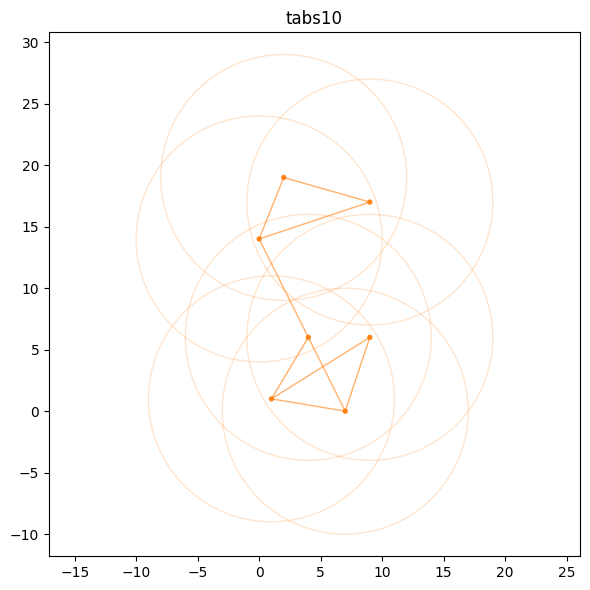

In [7]:
X = np.array(data)
plot_rips_complex(X, R=10, label='X', maxdim=1)

/tmp/ipykernel_13345/2254490326.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = cm.get_cmap("tab10")


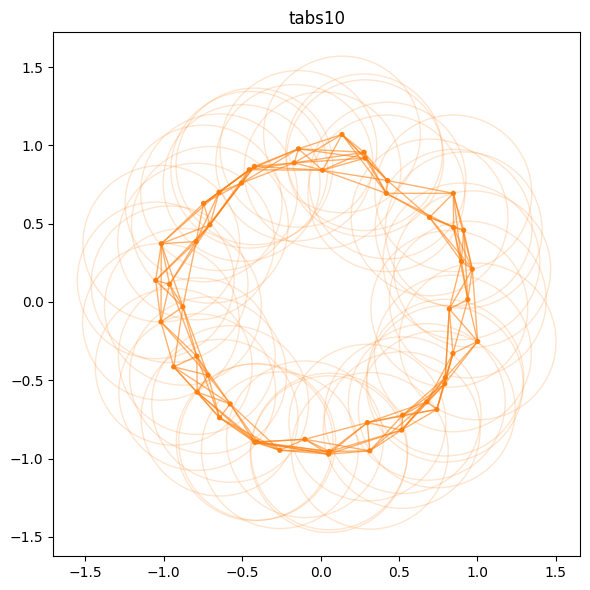

In [20]:
# Create a circle of points with radius 1 and noise
import sklearn.datasets
X, _ = sklearn.datasets.make_circles(n_samples=50, factor=.9, noise=0.05)

plot_rips_complex(X, R=.5, label='X', maxdim=1)